

# Problem Statement

Employee attrition poses significant challenges for organizations, impacting productivity, morale, and costs. Accurately predicting which employees are likely to leave enables proactive HR interventions and strategic planning. This project aims to develop robust machine learning models to identify employees at risk of attrition, focusing on maximizing recall to ensure that most true attrition cases are detected. The analysis addresses class imbalance, feature scaling, and model selection, providing actionable insights for HR professionals.


In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import time
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm



In [3]:
HR_df = pd.read_csv("../data/raw/HR-Employee-Attrition.csv") #import the dataset

## Exploratory Data Analysis (EDA)

In [35]:
print("\n---------- Data Overview ----------")
HR_df.head()  # Display the first few rows of the dataset



---------- Data Overview ----------


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [36]:
HR_df.info()# information about the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [42]:
HR_df.describe() # statistical summary of the dataset


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [43]:
HR_df.isnull().sum() # shows the number of missing values in each column

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Visulizations

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>],
       [<Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'MonthlyRate'}>],
       [<Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'YearsAtCompany'}>,
        <Axes: title={'center': 'TotalWorkingYears'}>]], dtype=object)

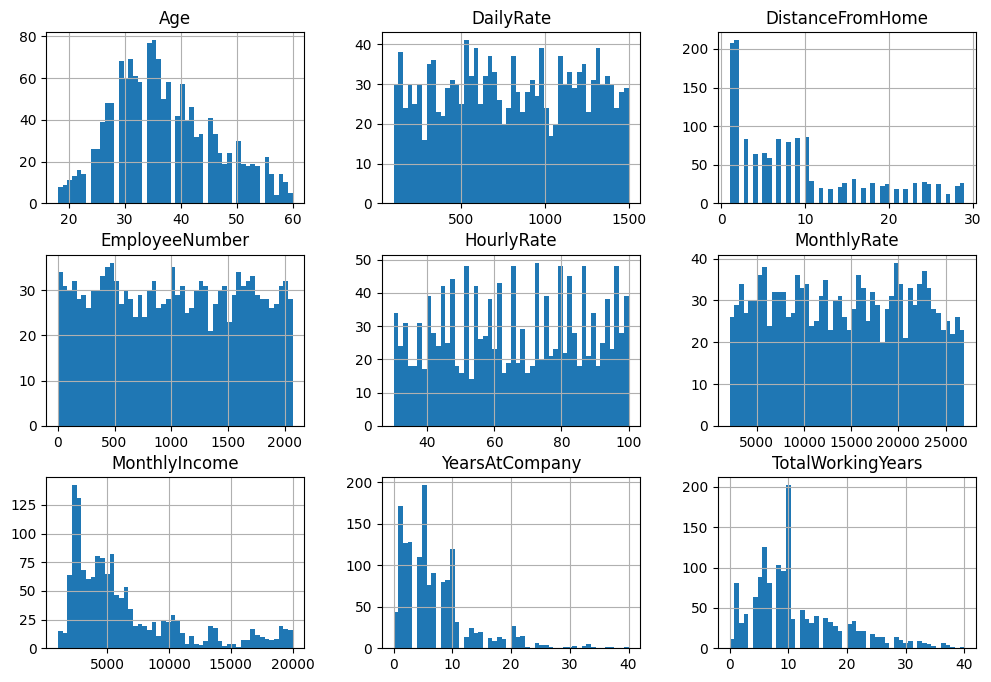

In [47]:
# Histogram of numeric features
columns = [
    "Age",
    "DailyRate",
    "DistanceFromHome",
    "EmployeeNumber",
    "HourlyRate",
    "MonthlyRate",
    "MonthlyIncome",
    "YearsAtCompany",
    "TotalWorkingYears"
]
HR_df[columns].hist(figsize=(12, 8), bins=50)

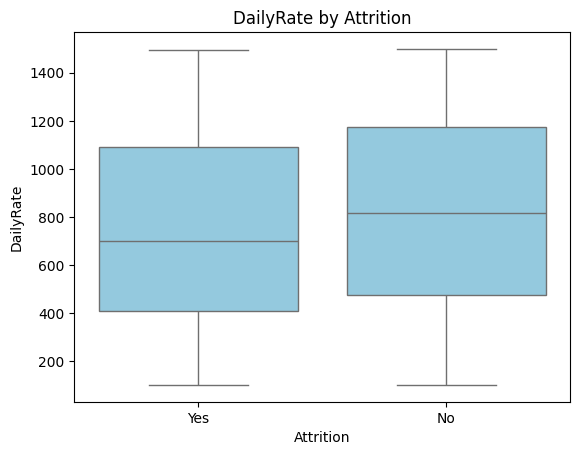

In [48]:
### boxplot for DailyRate by Attrition
sns.boxplot(x="Attrition", y="DailyRate", data=HR_df, color="skyblue")
plt.title("DailyRate by Attrition")
plt.show()

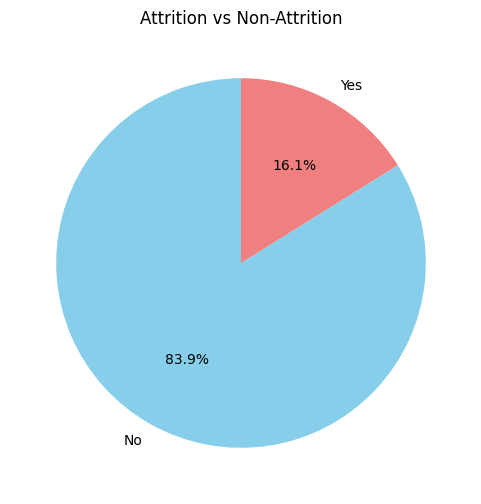

In [49]:
# piechart for Attrition

attrition_counts = HR_df['Attrition'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Attrition vs Non-Attrition')
plt.show()


### Data Preprocessing

In [53]:
#define functions for testing different transformations
def log_trans(df, columns):
    for features in columns:
        df[f'{features}_log'] = np.log1p(df[features])
    return df

def sqrt_trans(df, columns):
    for features in columns:
        df[f'{features}_sqrt'] = np.sqrt(df[features])
    return df

def cbrt_trans(df, columns):
    for features in columns:
        df[f'{features}_cbrt'] = np.cbrt(df[features])
    return df


---------- Normalize skewed numerical data ----------


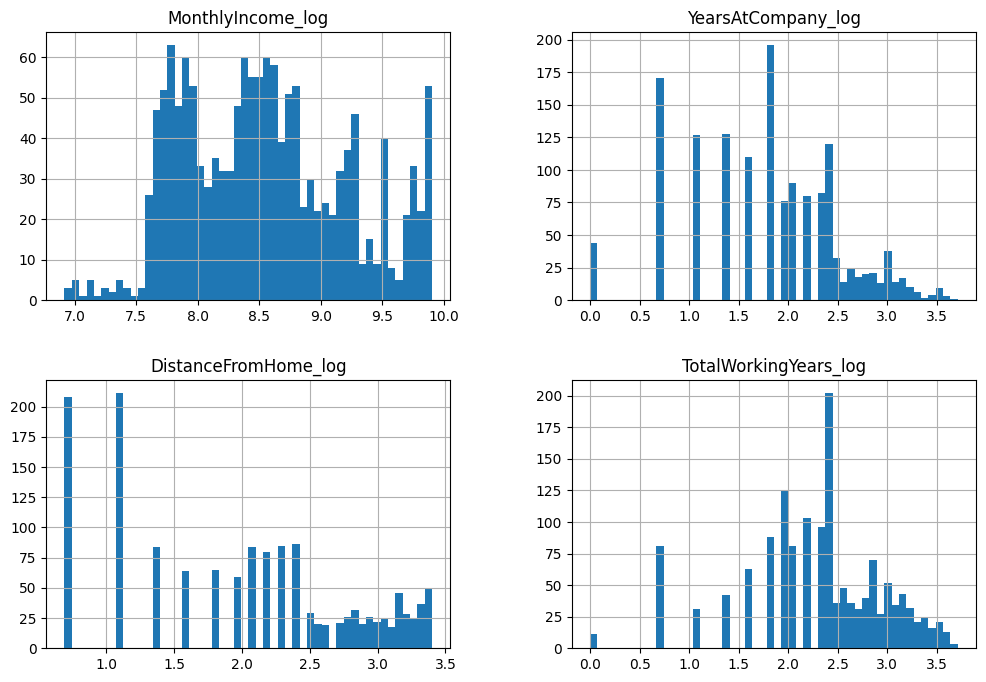


 DistanceFromHome_log and YearsAtCompany_log are still right skewed attemped different transformations


In [59]:
print("\n---------- Normalize skewed numerical data ----------")
# attempt log transformation
HR_df_log = log_trans(HR_df, ['MonthlyIncome', 'YearsAtCompany', 'TotalWorkingYears', 'DistanceFromHome'])
# Histogram of log tranformation features 
logged_features = [
    "MonthlyIncome_log",
    "YearsAtCompany_log",
    "DistanceFromHome_log",
    "TotalWorkingYears_log",
]
HR_df_log[logged_features].hist(figsize=(12, 8), bins=50)
plt.show()
print("\n DistanceFromHome_log and YearsAtCompany_log are still right skewed attemped different transformations")

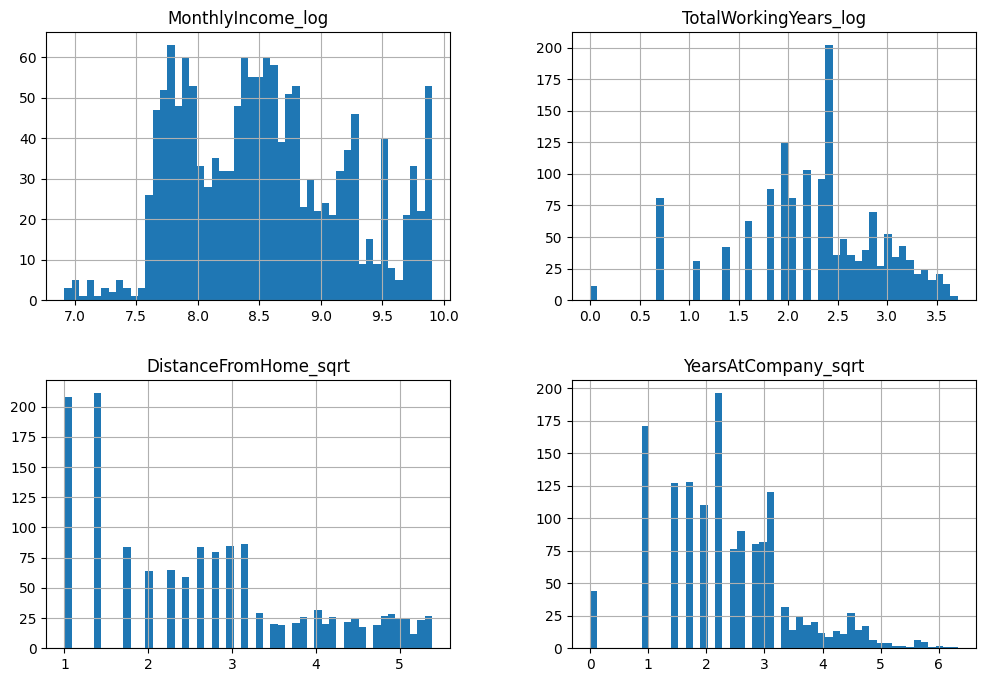


 SQRT transformation not working for distance from home, try CBRT transformation


In [145]:
## attempt sqrt transformation on  DistanceFromHome and YearsAtCompany
HR_df_log_sqrt = HR_df_log.copy().drop(columns=['DistanceFromHome_log', 'YearsAtCompany_log'], errors='ignore')
HR_df_log_sqrt = sqrt_trans(HR_df_log_sqrt, ['DistanceFromHome', 'YearsAtCompany'])

logged_n_sqrt_features= [
    "MonthlyIncome_log",
    "TotalWorkingYears_log",
    "DistanceFromHome_sqrt",
    "YearsAtCompany_sqrt"
]
HR_df_log_sqrt[logged_n_sqrt_features].hist(figsize=(12, 8), bins=50)
plt.show()
print("\n SQRT transformation not working for distance from home, try CBRT transformation")

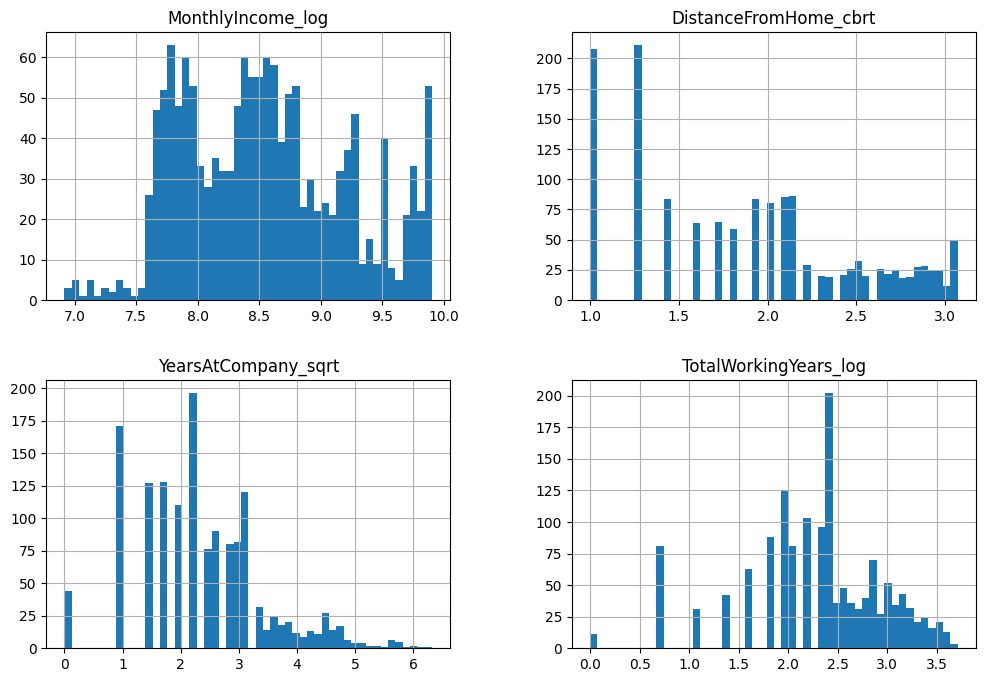


---------- All numerical Data now roughly bell shaped ----------


In [ ]:
# Trying CBRT transformation on DistanceFromHome
HR_df_log_sqrt_crbt = HR_df_log_sqrt.copy().drop(columns=['DistanceFromHome_sqrt'], errors='ignore')
HR_df_log_sqrt_crbt = cbrt_trans(HR_df_log_sqrt_crbt, ['DistanceFromHome'])

logged_n_sqrt_features= [
    "MonthlyIncome_log",
    "DistanceFromHome_cbrt",
    "YearsAtCompany_sqrt",
    "TotalWorkingYears_log"
]
HR_df_log_sqrt_crbt[logged_n_sqrt_features].hist(figsize=(12, 8), bins=50)
plt.show()
print("\n---------- All numerical Data now roughly bell shaped ----------")

In [71]:
#Drop the original features that were transformed
HR_df_transformed = HR_df_log_sqrt_crbt.copy().drop(columns=['MonthlyIncome', 'YearsAtCompany', "TotalWorkingYears", 'DistanceFromHome'])

In [146]:
#--------------------------------------------------------------------
# feature scaling
#--------------------------------------------------------------------
# The following features are selected for scaling because they are Continuous numerical Features;
# Scaling helps to standardize these features, improving model convergence and performance.
features_to_scale = [
    "Age",
    "EmployeeCount",
    "DailyRate",
    "EmployeeNumber",
    "HourlyRate",
    "MonthlyRate",
    "NumCompaniesWorked",
    "PercentSalaryHike",
    "StandardHours",
    "StockOptionLevel",
    "TrainingTimesLastYear",
    "WorkLifeBalance",
    "YearsInCurrentRole",
    "YearsSinceLastPromotion",
    "YearsWithCurrManager",
    "MonthlyIncome_log",
    "TotalWorkingYears_log",
    "DistanceFromHome_cbrt",
    "YearsAtCompany_sqrt"
]

print("\n---------- Scaling selected features ----------")
scaler = StandardScaler()
HR_df_transformed_scaled = HR_df_transformed.copy()
HR_df_transformed_scaled[features_to_scale] = scaler.fit_transform(HR_df_transformed_scaled[features_to_scale])
HR_df_transformed_scaled.head()  # Display the first few rows of the scaled dataset



---------- Scaling selected features ----------


,Age,Attrition,BusinessTravel,DailyRate,Department,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncome_log,TotalWorkingYears_log,YearsAtCompany_sqrt,DistanceFromHome_cbrt
0,0.446350,Yes,Travel_Rarely,0.742527,Sales,2,Life Sciences,0.0,-1.701283,2,...,-0.932014,-2.171982,-2.493820,-0.063296,-0.679146,0.245834,0.219493,-0.138921,0.040574,-1.412629
1,1.322365,No,Travel_Frequently,-1.297775,Research & Development,1,Life Sciences,0.0,-1.699621,3,...,0.241988,0.155707,0.338096,0.764998,-0.368715,0.806541,-0.014600,0.148411,0.684253,0.159829
2,0.008343,Yes,Travel_Rarely,1.414363,Research & Development,2,Other,0.0,-1.696298,4,...,-0.932014,0.155707,0.338096,-1.167687,-0.679146,-1.155935,-1.366318,-0.307569,-2.171423,-1.003914
3,-0.429664,No,Travel_Frequently,1.461466,Research & Development,4,Life Sciences,0.0,-1.694636,4,...,-0.932014,0.155707,0.338096,0.764998,0.252146,-1.155935,-0.868626,-0.138921,0.382771,-0.717210
4,-1.086676,No,Travel_Rarely,-0.524295,Research & Development,1,Medical,0.0,-1.691313,1,...,0.241988,0.155707,0.338096,-0.615492,-0.058285,-0.595227,-0.604032,-0.498767,-0.894326,-1.003914


In [79]:
print("\n---------- Summary of scaled features ----------")
HR_df_transformed_scaled[features_to_scale].describe()  # Display summary statistics of the scaled dataframe


---------- Summary of scaled features ----------


,Age,EmployeeCount,DailyRate,EmployeeNumber,HourlyRate,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncome_log,TotalWorkingYears_log,DistanceFromHome_cbrt,YearsAtCompany_sqrt
count,1.470000e+03,1470.0,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1470.0,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03
mean,-3.504377e-17,0.0,5.075305e-17,-1.546760e-16,1.691768e-16,3.021015e-17,1.450087e-17,2.271803e-16,0.0,6.767074e-17,8.700523e-17,-6.042030e-18,9.063045e-17,1.208406e-18,-2.779334e-17,-5.135726e-16,5.316986e-17,-3.335201e-16,-1.147986e-16
std,1.000340e+00,0.0,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,0.0,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00
min,-2.072192e+00,0.0,-1.736576e+00,-1.701283e+00,-1.766079e+00,-1.717284e+00,-1.078504e+00,-1.150554e+00,0.0,-9.320144e-01,-2.171982e+00,-2.493820e+00,-1.167687e+00,-6.791457e-01,-1.155935e+00,-2.462096e+00,-3.285032e+00,-1.412629e+00,-2.171423e+00
25%,-7.581700e-01,0.0,-8.366616e-01,-8.866700e-01,-8.803615e-01,-8.806440e-01,-6.780494e-01,-8.772324e-01,0.0,-9.320144e-01,-6.201892e-01,-1.077862e+00,-6.154916e-01,-6.791457e-01,-5.952272e-01,-8.675914e-01,-4.987670e-01,-1.003914e+00,-6.073047e-01
50%,-1.011589e-01,0.0,-1.204135e-03,-7.253514e-03,5.355811e-03,-1.090645e-02,-2.775943e-01,-3.305891e-01,0.0,2.419883e-01,1.557071e-01,3.380962e-01,-3.393937e-01,-3.687153e-01,-3.148735e-01,-7.783665e-02,1.484112e-01,2.291713e-02,-1.521550e-01
75%,6.653541e-01,0.0,8.788772e-01,8.821327e-01,8.787715e-01,8.641014e-01,5.233157e-01,7.626976e-01,0.0,2.419883e-01,1.557071e-01,3.380962e-01,7.649976e-01,2.521455e-01,8.065415e-01,7.240791e-01,6.849187e-01,8.047610e-01,5.377094e-01
max,2.526886e+00,0.0,1.726730e+00,1.733302e+00,1.678377e+00,1.782888e+00,2.525591e+00,2.675949e+00,0.0,2.589994e+00,2.483396e+00,1.754054e+00,3.802074e+00,3.977310e+00,3.610079e+00,2.033974e+00,2.032272e+00,1.846003e+00,3.539930e+00


In [82]:

#--------------------------------------------------------------------
# One hot encoding categorical features
#--------------------------------------------------------------------
One_hot_encoded_columns = [
    "Attrition",
    "BusinessTravel",
    "Gender",
    "EducationField",
    "JobRole",
    "Department",
    "MaritalStatus",
    "OverTime",
    "Over18",
]
HR_df_encoded_transformed_scaled = pd.get_dummies(HR_df_transformed_scaled, columns=One_hot_encoded_columns, drop_first=True)   
HR_df_encoded_transformed_scaled.head()  # Display the first few rows of the encoded dataframe


,Age,DailyRate,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.446350,0.742527,2,0.0,-1.701283,2,1.383138,3,2,4,...,False,False,False,True,False,False,True,False,True,True
1,1.322365,-1.297775,1,0.0,-1.699621,3,-0.240677,2,2,2,...,False,False,True,False,False,True,False,True,False,False
2,0.008343,1.414363,2,0.0,-1.696298,4,1.284725,2,1,3,...,False,False,False,False,False,True,False,False,True,True
3,-0.429664,1.461466,4,0.0,-1.694636,4,-0.486709,3,1,3,...,False,False,True,False,False,True,False,True,False,True
4,-1.086676,-0.524295,1,0.0,-1.691313,1,-1.274014,3,1,2,...,False,False,False,False,False,True,False,True,False,False


In [ ]:
#--------------------------------------------------------------------
# Correlation Analysis
#--------------------------------------------------------------------
print("\n---------- Correlation Analysis ----------")
corr_matrix = HR_df_encoded_transformed_scaled.corr()
corr_matrix['Attrition_Yes'].sort_values(ascending=False) # correlation of each feature with Attrition (Yes)
# linear Relationships between features and target variable is weak, try logistic regression for feature selection


---------- Correlation Analysis ----------


Attrition_Yes                        1.000000
OverTime_Yes                         0.246118
MaritalStatus_Single                 0.175419
JobRole_Sales Representative         0.157234
BusinessTravel_Travel_Frequently     0.115143
JobRole_Laboratory Technician        0.098290
Department_Sales                     0.080855
DistanceFromHome_cbrt                0.079090
EducationField_Technical Degree      0.069355
EducationField_Marketing             0.055781
NumCompaniesWorked                   0.043494
JobRole_Human Resources              0.036215
Gender_Male                          0.029453
JobRole_Sales Executive              0.019774
MonthlyRate                          0.015170
PerformanceRating                    0.002889
JobRole_Research Scientist          -0.000360
HourlyRate                          -0.006846
EmployeeNumber                      -0.010577
PercentSalaryHike                   -0.013478
EducationField_Other                -0.017898
Education                         

In [ ]:
#--------------------------------------------------------------------
# Logistic Regression Feature selection
#--------------------------------------------------------------------

def fit_logistic_model(df, target):
    # Select all numeric columns
    X = df.drop(target, axis=1)
    X = sm.add_constant(X)  # adds intercept
    X = X.astype(float)
    for col in X.columns:
        if X[col].nunique() < 2:
            X.drop(col, axis=1, inplace=True) # ensure all features have more than one unique value to avoid singular matrix errors
    y = df[target].astype(float)  # ensure target is float

    model = sm.Logit(y, X).fit()
    return model

In [92]:

model = fit_logistic_model(HR_df_encoded_transformed_scaled, 'Attrition_Yes')
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.286332
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          Attrition_Yes   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1425
Method:                           MLE   Df Model:                           44
Date:                Sat, 09 Aug 2025   Pseudo R-squ.:                  0.3517
Time:                        17:29:02   Log-Likelihood:                -420.91
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 4.784e-70
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.1486      0.123     -1

In [ ]:
#now we select the features with p-values less than 0.05 to identify significant predictors of attrition
print("\n---------- Significant Features ----------")
selected_features = []
for feature, pvalue in model.pvalues.sort_values(ascending=True).items():
    if pvalue < 0.05:  # significance level
        print(f"Feature: {feature}, P-Value: {pvalue}")
        selected_features.append(feature)
    


---------- Significant Features ----------
Feature: OverTime_Yes, P-Value: 5.101306945193816e-25
Feature: EnvironmentSatisfaction, P-Value: 7.58013906119853e-09
Feature: NumCompaniesWorked, P-Value: 2.2105290742341258e-08
Feature: JobSatisfaction, P-Value: 2.747341596532657e-07
Feature: BusinessTravel_Travel_Frequently, P-Value: 9.96719828801514e-07
Feature: JobInvolvement, P-Value: 1.5411005418042604e-06
Feature: YearsSinceLastPromotion, P-Value: 2.2123229244748735e-06
Feature: DistanceFromHome_cbrt, P-Value: 1.6211047832361937e-05
Feature: TotalWorkingYears_log, P-Value: 0.0002465404285487414
Feature: RelationshipSatisfaction, P-Value: 0.0003239647993872149
Feature: MaritalStatus_Single, P-Value: 0.001286044757549918
Feature: WorkLifeBalance, P-Value: 0.0020436186189021002
Feature: BusinessTravel_Travel_Rarely, P-Value: 0.00470777495361401
Feature: TrainingTimesLastYear, P-Value: 0.009778813239984082
Feature: Gender_Male, P-Value: 0.02088656786002245
Feature: MonthlyIncome_log, P-Va

## Model Training

In [ ]:
#--------------------------------------------------------------------
# Train-Test Split
#--------------------------------------------------------------------
print("\n---------- Train-Test Split ----------")

X = HR_df_encoded_transformed_scaled[selected_features]  # explanatory variables
y = HR_df_encoded_transformed_scaled["Attrition_Yes"]  # target/response variable

X_train, X_test, y_train, y_test = train_test_split( #stratify to maintain class balance
    X, y, test_size=0.2, stratify=y, random_state=42
)

# checking class balance
print(f"Y-train class {y_train.value_counts()}")
print(f"Y-test class {y_test.value_counts()}")



---------- Train-Test Split ----------
Y-train class Attrition_Yes
False    986
True     190
Name: count, dtype: int64
Y-test class Attrition_Yes
False    247
True      47
Name: count, dtype: int64


In [117]:
# --------------------------------------------------------------------
# Logistic regression training script
# --------------------------------------------------------------------
# Pipe: overampling to handle class imbalance + Logistic Regression Classifier
pipe_log = Pipeline(
    [
        (
            "oversample",
            RandomOverSampler(random_state=42),
        ),  # overampling to handle class imbalance
        ("classifier", LogisticRegression(max_iter=1000, random_state=42)),
    ]
)
pipe_log.get_params()

# Define the parameter grid for Logistic Regression

parameters_grid = {
    "classifier__C": [0.01, 0.1, 1, 10],
    "classifier__penalty": ["l1", "l2"],
    "classifier__solver": ["liblinear", "saga"],
    "classifier__class_weight": [None, "balanced"],
}

scoring_log = {
    "precision": "precision",
    "recall": "recall",
    "f1": "f1"
}
grid_search_log = GridSearchCV(pipe_log, parameters_grid, cv=5, scoring=scoring_log, refit="recall")

start_time_log = time.time()
grid_search_log.fit(X_train, y_train) # train logistic regression model
end_time_log = time.time()

print(f"Logistic Regression training time: {end_time_log - start_time_log} seconds")

Logistic Regression training time: 1.8721749782562256 seconds


In [121]:
# --------------------------------------------------------------------
# Random Forest training script
# --------------------------------------------------------------------
# Pipe: oversampling to handle class imbalance + Random Forest Classifier
pipe_forest = Pipeline(
    [
        (
            "oversample",
            RandomOverSampler(random_state=42), 
        ),
        ("classifier", RandomForestClassifier(random_state=42)),
    ]
)
pipe_forest.get_params()

# Define the parameter grid for Random Forest
parameters_grid = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__max_depth": [None, 10, 20, 30],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4],
    "classifier__class_weight": [None, "balanced"],
    "classifier__max_features": ["sqrt", "log2"],
}
scoring_forest = {
    "precision": "precision",
    "recall": "recall",
    "f1": "f1"
}

# Hyperparameter tuning: Create a GridSearchCV object for Random Forest
grid_search_forest = GridSearchCV(
    pipe_forest, parameters_grid, cv=5, scoring=scoring_forest, refit="recall"
) 


start_time = time.time()
grid_search_forest.fit(X_train, y_train) # train random forest model
end_time = time.time()
print(f"Random Forest training time: {end_time - start_time} seconds")

Random Forest training time: 235.61329984664917 seconds


## Model Evaluation

In [134]:
#---------------------------------------------------------------------
# Model Evaluation logistic Regression Training Set
#---------------------------------------------------------------------
print("\n---------- Logistic Regression Model Evaluation (training) ----------")
y_train_pred = grid_search_log.predict(X_train)
print(classification_report(y_train, y_train_pred))



---------- Logistic Regression Model Evaluation (training) ----------
              precision    recall  f1-score   support

       False       0.95      0.78      0.86       986
        True       0.41      0.78      0.54       190

    accuracy                           0.78      1176
   macro avg       0.68      0.78      0.70      1176
weighted avg       0.86      0.78      0.81      1176



False(No Attrition): High presision (0.95), Moderate recall (0.78), Strong F1 score (0.86). Model is good at idenifying Employee's who stay

True (Attrition): Lower precision (0.38) and great recall (0.70) considering class imbalance. F1-score is moderate (0.49). The model is good at catching actual attrition cases, but produces a lot of false positives. 

In [137]:
#---------------------------------------------------------------------
# Model Evaluation logistic Regression testing Set
#---------------------------------------------------------------------
print("\n---------- Logistic Regression Model Evaluation (test set) ----------")
y_test_pred = grid_search_log.predict(X_test)
print(classification_report(y_test, y_test_pred))
print("\n Performance metrics for Logistic Regression test and traning set similar, no overfitting detected")




---------- Logistic Regression Model Evaluation (test set) ----------
              precision    recall  f1-score   support

       False       0.93      0.78      0.85       247
        True       0.38      0.70      0.49        47

    accuracy                           0.77       294
   macro avg       0.65      0.74      0.67       294
weighted avg       0.84      0.77      0.79       294


 Performance metrics for Logistic Regression test and traning set similar, no overfitting detected


In [139]:
#---------------------------------------------------------------------
# Model Evaluation Random Forest (training Set)
#---------------------------------------------------------------------
print("\n---------- Random Forest Model Evaluation (training set) ----------")
y_train_pred = grid_search_forest.predict(X_train)
print(classification_report(y_train, y_train_pred))



---------- Random Forest Model Evaluation (training set) ----------
              precision    recall  f1-score   support

       False       0.99      0.98      0.98       986
        True       0.90      0.95      0.92       190

    accuracy                           0.97      1176
   macro avg       0.94      0.97      0.95      1176
weighted avg       0.98      0.97      0.97      1176



In [140]:
#---------------------------------------------------------------------
# Model Evaluation Random Forest (testing Set)
#---------------------------------------------------------------------
print("\n---------- Random Forest Model Evaluation (test set) ----------")

y_test_pred = grid_search_forest.predict(X_test)
print(classification_report(y_test, y_test_pred))



---------- Random Forest Model Evaluation (test set) ----------
              precision    recall  f1-score   support

       False       0.90      0.92      0.91       247
        True       0.51      0.45      0.48        47

    accuracy                           0.84       294
   macro avg       0.70      0.68      0.69       294
weighted avg       0.84      0.84      0.84       294



Discrepancy between scoring metrics of True (attrition) cases suggest overfitting:

Precision: 0.90 (training) vs 0.51 (testing)

Recall: 0.95 (training) vs 0.45 (testing)

F1-Score: 0.92 (training) vs 0.48 (testing)

---


### Model Selection Summary & Testing Set Results

Logistic regression was selected as the best model for predicting employee attrition due to its strong recall, meaning it successfully identifies most employees at risk of leaving. High recall is crucial in this context because missing true attrition cases can be costly for the organization, and proactive intervention is needed.

On the testing set, logistic regression maintained balanced performance and did not overfit, unlike random forest, which showed higher precision but significant overfitting and lower recall. Logistic regression also offers clear interpretability of feature importance and decision boundaries.

**Why Recall Matters:**
- Maximizes detection of true attrition cases, even if some false positives occur.
- Aligns with business needs to minimize missed attrition cases and support HR interventions.

**Model Selection Rationale:**
- Balanced training and testing performance (no overfitting)
- Superior recall for the attrition class
- Interpretability for actionable insights

Therefore, logistic regression is the optimal choice, providing reliable and generalizable predictions for employee attrition.

Note** Random Forest can be used if the goal is to capture more precision (correctly idenifying attrition cases)